<a href="https://colab.research.google.com/github/chaewoncutie/ADV-ML-tests/blob/main/K%3D6%2C_10%2C_12_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Install necessary packages
!pip install -U scikit-learn nltk pandas matplotlib seaborn scipy wordcloud ipywidgets tensorflow keras xgboost hdbscan

In [25]:
# Import necessary libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from wordcloud import WordCloud
import numpy as np
from collections import Counter
from IPython.display import display
from google.colab import files

In [15]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Upload the JSON file
uploaded = files.upload()

# Read the JSON file
df = pd.read_json(next(iter(uploaded)), lines=True)
df = df[['headline', 'short_description']].dropna()
df['text'] = df['headline'] + " " + df['short_description']

df.head()

Saving News_Category_Dataset_v3.json to News_Category_Dataset_v3 (3).json


,headline,short_description,text
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,Over 4 Million Americans Roll Up Sleeves For O...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"American Airlines Flyer Charged, Banned For Li..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",23 Of The Funniest Tweets About Cats And Dogs ...
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",The Funniest Tweets From Parents This Week (Se...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,Woman Who Called Cops On Black Bird-Watcher Lo...


In [17]:
# Limit dataset size for faster processing
df = df.sample(n=50000, random_state=42)

# Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

In [18]:
# Tokenize, remove stopwords, and apply lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])

df['filtered_text'] = df['processed_text'].apply(tokenize_and_lemmatize)

In [19]:
# TF-IDF Vectorization with bigrams
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2), max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df['filtered_text'])

In [20]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X.toarray())

In [21]:
# Normalize data
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X_pca)

k=6, silhouette score=0.08552288668643798, Calinski-Harabasz score=2107.5739973319523, inertia=40621.09504035902


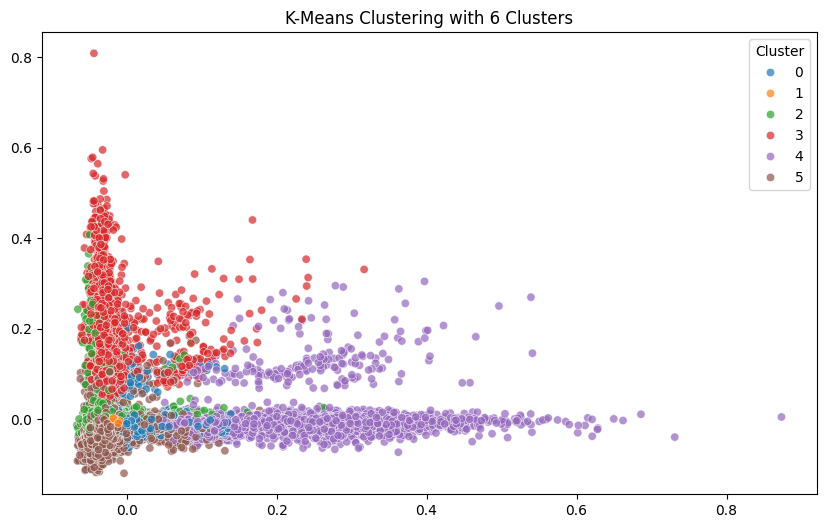

k=10, silhouette score=0.1050173223200083, Calinski-Harabasz score=1726.030151948357, inertia=37523.108066658235


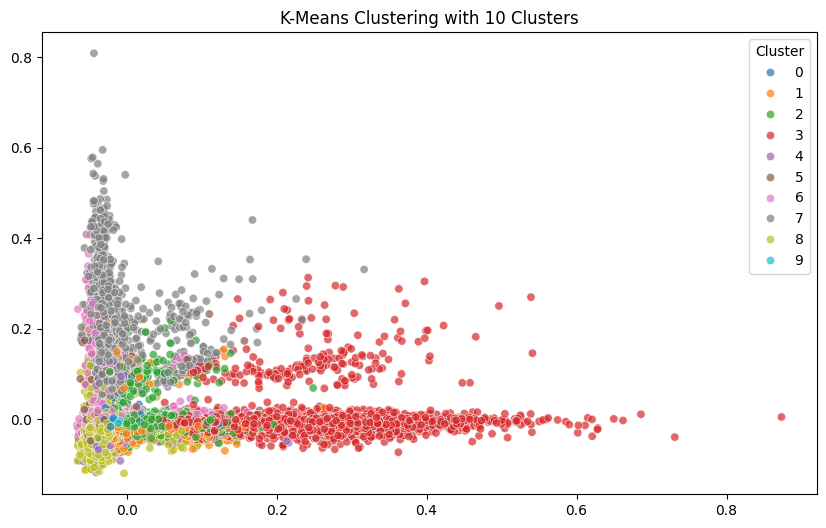

k=12, silhouette score=0.11728899940758518, Calinski-Harabasz score=1612.718577088297, inertia=36300.786359337304


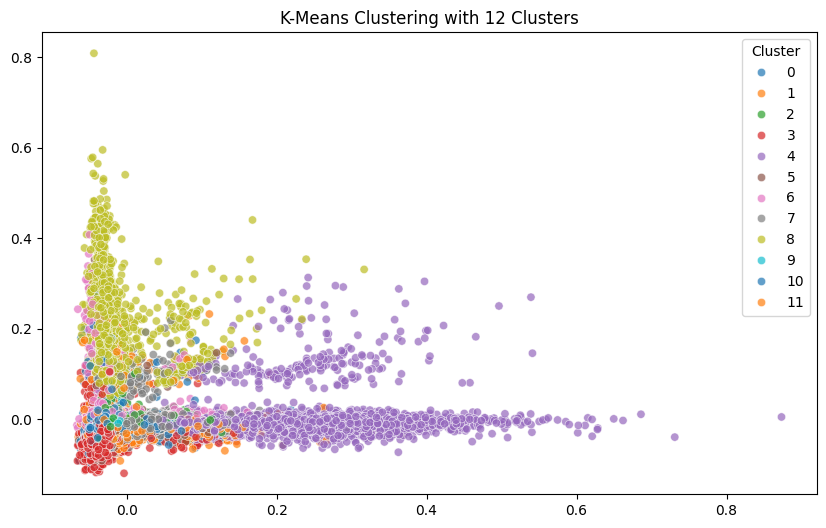

In [22]:
# Fixed K values for clustering
K_values = [6, 10, 12]

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_normalized)
    sil_score = silhouette_score(X_normalized, kmeans_labels)
    calinski_score = calinski_harabasz_score(X_normalized, kmeans_labels)
    inertia = kmeans.inertia_
    print(f'k={k}, silhouette score={sil_score}, Calinski-Harabasz score={calinski_score}, inertia={inertia}')
    df[f'cluster_kmeans_{k}'] = kmeans_labels

    # Visualize KMeans clustering
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', alpha=0.7)
    plt.title(f'K-Means Clustering with {k} Clusters')
    plt.legend(title='Cluster')
    plt.show()

In [26]:
# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, min_samples=10, metric='euclidean')
hdb_labels = clusterer.fit_predict(X_normalized)
df['cluster_hdbscan'] = hdb_labels
print("HDBSCAN clustering completed.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN clustering completed.


In [27]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_normalized)
df['cluster_dbscan'] = dbscan_labels
print("DBSCAN clustering completed.")

DBSCAN clustering completed.


In [28]:
# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(X_normalized)
df['cluster_gmm'] = gmm_labels
print("GMM clustering completed.")

GMM clustering completed.


In [29]:
# Apply Mean Shift
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(X_normalized)
df['cluster_meanshift'] = meanshift_labels
print("Mean Shift clustering completed.")

Mean Shift clustering completed.


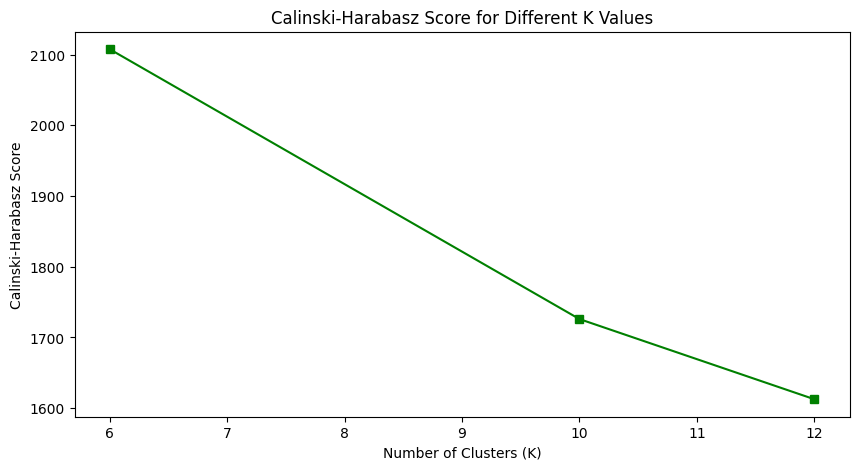

In [30]:
# Plot Calinski-Harabasz Scores
plt.figure(figsize=(10, 5))
plt.plot(K_values, [calinski_harabasz_score(X_normalized, KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_normalized)) for k in K_values], marker='s', linestyle='-', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different K Values')
plt.show()